# Name of the Project: Fake SMS Classification
Data Set has 5 columns as i. v1: ham/spam ii. v2: sms text iii. Unnamed: 2 NaN iv. Unnamed: 3 NaN  v.Unnamed: Unnamed: 4 NaN 
Classify the text as ham or spam

# Create environment & read the data set

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
path = r"G:\DO IT-23\Fake SMS Classification-03\spam.csv"
df = pd.read_csv(path,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Preprocessing

In [35]:
df.shape

(5572, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [38]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis= True, inplace= True)

In [39]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [41]:
df.duplicated().sum()

403

In [42]:
df = df.drop_duplicates(keep ='first')

In [43]:
df.shape

(5169, 2)

In [44]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace = True)

In [45]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [46]:
# convert target column data as numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
df['target'] = encoder.fit_transform(df['target'])

In [48]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [49]:
value_count = df['target'].value_counts()
value_count

target
0    4516
1     653
Name: count, dtype: int64

Here data set embalance.

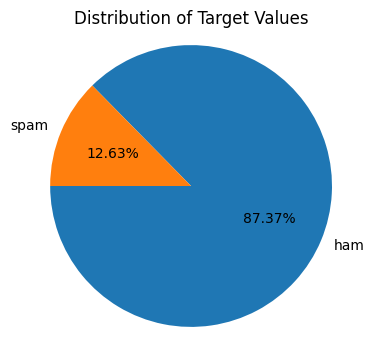

In [50]:
# Create a pie plot using Seaborn
plt.figure(figsize=(4, 4))
labels = ['ham', 'spam']

# Plot the pie chart
plt.pie(value_count, labels = labels, autopct='%1.2f%%', startangle=180)
plt.title('Distribution of Target Values')
plt.axis('equal')

# Show the plot
plt.show()

# Stemming:
Stemming is the process of reducing a word to its Root word example: actor, actress, acting --> act

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdutp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [53]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
port_stem = PorterStemmer()

In [55]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [56]:
df['text'] = df['text'].apply(stemming)

In [57]:
print(df['text'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object


In [58]:
# to show the image and find the repeated word import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color ='white')

In [59]:
fake_wc = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

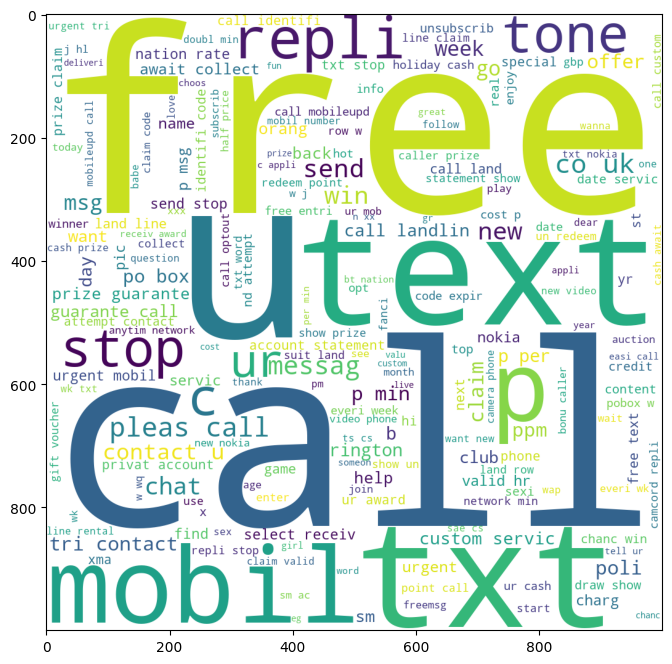

In [60]:
plt.figure(figsize=(8,8))
plt.imshow(fake_wc)

In [61]:
real_wc = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

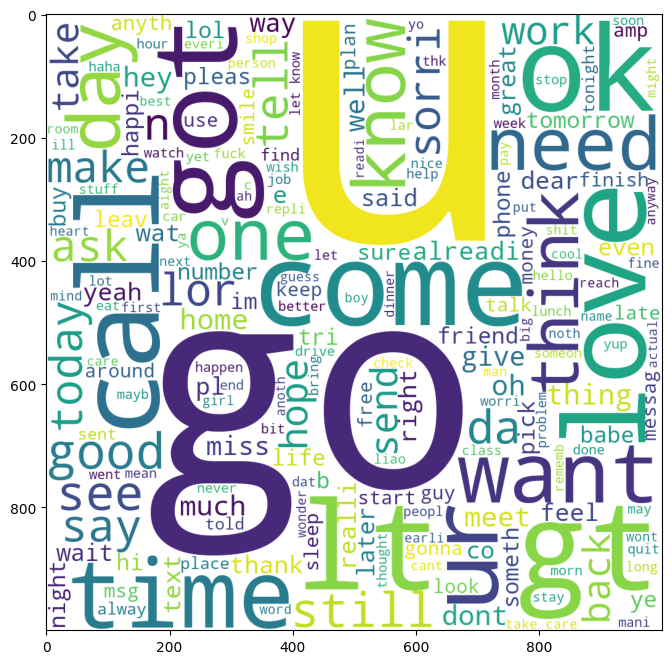

In [62]:
plt.figure(figsize=(8,8))
plt.imshow(real_wc)

In [63]:
# for deployment
df.to_csv("new_data.csv")

# Model building & Evaluation

In [64]:
# Separating the data & label
X = df['text']
y = df['target']

In [65]:
#separating the data and label
X = df['text'].values
y = df['target'].values

In [66]:
print(X)
print(y)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'piti mood suggest'
 'guy bitch act like interest buy someth els next week gave us free'
 'rofl true name']
[0 0 1 ... 0 0 0]


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [69]:
# Create a Pipeline with TfidfVectorizer and a classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [70]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [71]:
accuracy_train_lgr = accuracy_score(y_train,y_pred_train)
accuracy_test_lgr = accuracy_score(y_test,y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)

print("Accuracy on train-lgr :", accuracy_train_lgr)
print("Accuracy on test-lgr :", accuracy_test_lgr)
print("Confusion Matrix-lgr :\n", cm)
print("For LogisticRegression:", classification_report(y_test,y_pred_test))

Accuracy on train-lgr : 0.9666263603385732
Accuracy on test-lgr : 0.9661508704061895
Confusion Matrix-lgr :
 [[887   2]
 [ 33 112]]
For LogisticRegression:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [72]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.96034816 0.96518375 0.96131528 0.96131528 0.96030978]
Mean Accuracy: 0.9616944506339162


# Random Forest Classifier

In [73]:
# Create a Pipeline with TfidfVectorizer and a classifier
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [74]:
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
cm = confusion_matrix(y_test,y_pred_test_rf)

print("Accuracy on train-rf :", accuracy_train_lgr)
print("Accuracy on test-rf :", accuracy_test_lgr)
print("Confusion Matrix-rf :\n", cm)
print("For RandomForestClassifier:", classification_report(y_test,y_pred_test_rf))

Accuracy on train-rf : 0.9666263603385732
Accuracy on test-rf : 0.9661508704061895
Confusion Matrix-rf :
 [[888   1]
 [ 23 122]]
For RandomForestClassifier:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.84      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [75]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.97969052 0.97678917 0.97098646 0.97582205 0.97386254]
Mean Accuracy: 0.9754301474925148


# SVC

In [76]:
svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('classifier', SVC(kernel='linear',C=1.0, random_state =42))]
)

In [77]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [78]:
y_pred_train_svc = svc_pipeline.predict(X_train)
y_pred_test_svc = svc_pipeline.predict(X_test)

accuracy_train_svc = accuracy_score(y_train,y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test,y_pred_test_svc)
cm_svc = confusion_matrix(y_test,y_pred_test_svc)

print("Accuracy on train-svc :", accuracy_train_svc)
print("Accuracy on test-svc :", accuracy_test_svc)
print("Confusion Matrix-svc :\n", cm_svc)
print("For SVC:", classification_report(y_test,y_pred_test_svc))

Accuracy on train-svc : 0.9934703748488513
Accuracy on test-svc : 0.9854932301740812
Confusion Matrix-svc :
 [[885   4]
 [ 11 134]]
For SVC:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.97      0.92      0.95       145

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [80]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svc_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.98355899 0.98742747 0.98065764 0.9787234  0.98547919]
Mean Accuracy: 0.9831693383340105


# XGB

In [81]:
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('classifier', XGBClassifier())]
)

In [83]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [84]:
y_pred_train_xgb = xgb_pipeline.predict(X_train)
y_pred_test_xgb = xgb_pipeline.predict(X_test)

accuracy_train_xgb = accuracy_score(y_train,y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test,y_pred_test_xgb)
cm_xgb = confusion_matrix(y_test,y_pred_test_xgb)

print("Accuracy on train-xgb :", accuracy_train_xgb)
print("Accuracy on test-xgb :", accuracy_test_xgb)
print("Confusion Matrix-xgb :\n", cm_xgb)
print("For xgb:", classification_report(y_test,y_pred_test_xgb))

Accuracy on train-xgb : 0.9912938331318016
Accuracy on test-xgb : 0.9748549323017408
Confusion Matrix-xgb :
 [[883   6]
 [ 20 125]]
For xgb:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.86      0.91       145

    accuracy                           0.97      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [85]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.97969052 0.9729207  0.96034816 0.9729207  0.98160697]
Mean Accuracy: 0.9734974094719517


In [ ]:
# Decision: Here is the best result obtained by the SVC Classifier. We focus on the confusion matrix.

# Predictive System

In [86]:
X_new = [X_test[2]]  # Wrap the text in a list

prediction = svc_pipeline.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print('The SMS is Real')
else:
    print('The SMS is Fake')

[0]
The SMS is Real


In [87]:
print(y_test[204])

0


In [88]:
print(len(X_test))
print(len(y_test))

1034
1034


In [89]:
sms_text = "Free entry"

# Create a list containing the SMS text
X_new = [sms_text]

# Make a prediction using your model
prediction = svc_pipeline.predict(X_new)

# Check the prediction and print the result
if prediction[0] == 0:
    print('The SMS is classified as Real')
else:
    print('The SMS is classified as Fake')

The SMS is classified as Fake


In [90]:
# For Deployment

import pickle
with open("SVCModel.pkl", "wb") as model_file:
    pickle.dump(svc_pipeline, model_file)